In [1]:
from netCDF4 import Dataset
import numpy as np

In [2]:
my_example_nc_file = 'tmaxProc.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [19]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
tmax = fh.variables['t'][:][0]

tmax_units = fh.variables['t'].units

In [21]:
fh.variables

OrderedDict([(u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  standard_name: time
                  units: hours since 1951-1-1 00:00:00
                  calendar: proleptic_gregorian
                  axis: T
              unlimited dimensions: time
              current shape = (23011,)
              filling off), (u'lon', <type 'netCDF4._netCDF4.Variable'>
              float32 lon(lon)
                  standard_name: longitude
                  long_name: longitude
                  units: degrees_east
                  axis: X
              unlimited dimensions: 
              current shape = (31,)
              filling off), (u'lat', <type 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  standard_name: latitude
                  long_name: latitude
                  units: degrees_north
                  axis: Y
              unlimited dimensions: 
              current shape = (31,)
              filli

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [22]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [23]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

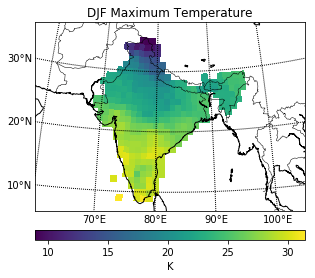

In [24]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(tmax))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(tmax_units)

# Add Title
plt.title('DJF Maximum Temperature')

plt.show()